# Solar Power Generation Forecasting 



## importing libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
#from keras.optimizers import  RMSprop, Adam, SGD
from keras.optimizers import  rmsprop_v2,adam_v2
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()  # needs to temp_irr_power_main2.csv

Saving temp_irr_power_main2.csv to temp_irr_power_main2.csv


## importing dataset

In [3]:

dts = pd.read_csv('temp_irr_power_main2.csv')
dts.head(3)

,measurementtimestamp,Irradiance Global (W/m^2),Back-of-Module Temperature 2 (deg C),Solar Power
0,2021-01-01T00:00:00.000Z,0,15.5,0.0
1,2021-01-01T00:15:00.000Z,0,15.7,0.0
2,2021-01-01T00:30:00.000Z,0,15.9,0.0


In [4]:
X = dts.iloc[:, [1,2]].values
y = dts.iloc[:, -1].values
 # Converting into integers 
y=np.array(y)
y=y.astype(int)
 #---------------------------


In [5]:
y.shape

(20314,)

In [6]:
X.shape

(20314, 2)

In [7]:
X[5556], y[5556]

(array([ 0. , 13.8]), 0)

In [ ]:
y

array([20, 24, 28, ..., 19, 20, 24])

## Splitting Training and Test sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (16251, 2) (16251,) 
Test Shape: (4063, 2) (4063,)


In [9]:
print(y_train[0:10].ravel())

[2592   86 4223    0    0    0 2549 6602    0    0]


## Creating Random forest


### defining accuracy function

In [17]:
X_train.size

32502

In [19]:
y_train.size

16251

In [21]:
 from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=0)

In [22]:

model.score(X_test, y_test)

0.8832573542545497

In [26]:
y_pred = model.predict(X_test)
y_pred1 = y_pred.reshape(len(y_pred), 1)
y_pred1

array([[   0.  ],
       [ 272.58],
       [   0.  ],
       ...,
       [   0.  ],
       [6088.47],
       [ 236.81]])

In [27]:


y_test1 = y_test.reshape(len(y_test), 1)
a = np.concatenate((y_pred1, y_test1), 1)
am = pd.DataFrame(data  = a, columns = ('Predicted Value', 'Real Value'))
pd.options.display.float_format = "{:,.2f}".format
am[1:10]

,Predicted Value,Real Value
1,272.58,405.00
2,0.00,0.00
3,"2,725.40","2,683.00"
4,"1,899.30","1,866.00"
5,0.00,0.00
6,0.00,0.00
7,0.00,0.00
8,0.00,0.00
9,"3,783.49","3,654.00"


In [28]:
len(y_pred)


4063

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8832573542545497

In [30]:
y_test.shape
#y_pred.shape
y_test
y_pred3=y_pred.astype(int)
y_pred3

array([   0,  272,    0, ...,    0, 6088,  236])

In [ ]:
y_pred1

array([[ 0.91492167],
       [ 0.        ],
       [ 0.        ],
       ...,
       [ 6.43150737],
       [13.38957014],
       [13.38957014]])

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
cm

array([[2221,    2,    1, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

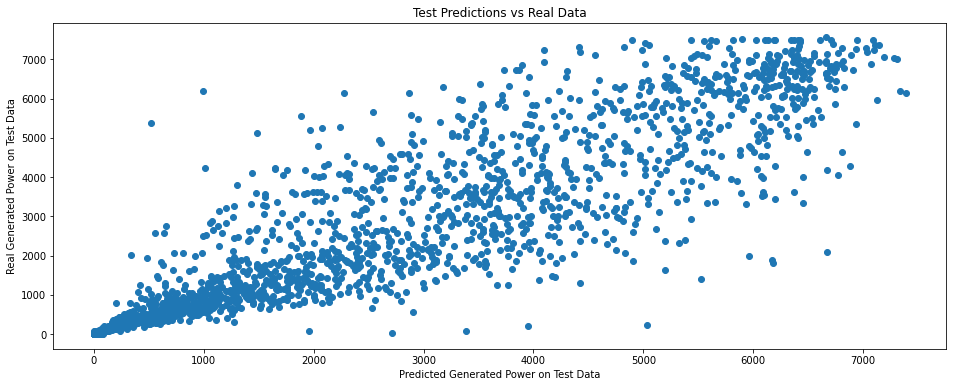

In [32]:
plt.figure(figsize=(16,6))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.show()

In [33]:
import pickle
with open('model_two_ip','wb') as file:
    pickle.dump(model,file)